# Building a Logistic Regression Classification Model

In [75]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [2]:
#Load the dataset

data=pd.read_csv('diabetes_na.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,NaN,85,66,29.0,0,26.6,0.351,NaN,0
2,8.0,183,64,0.0,0,NaN,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               766 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             767 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,766.000000,768.000000,768.000000,767.000000,768.000000,767.000000,768.000000,767.000000,768.000000
mean,3.849869,120.894531,69.105469,20.517601,79.799479,32.003911,0.471876,33.243807,0.348958
std,3.372270,31.972618,19.355807,15.954059,115.244002,7.883043,0.331329,11.767627,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Checking the Missing Values

In [6]:
data.isna().sum()

Pregnancies                 2
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

In [7]:
df=data.fillna(method='bfill')
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,8.0,85,66,29.0,0,26.6,0.351,32.0,0
2,8.0,183,64,0.0,0,28.1,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

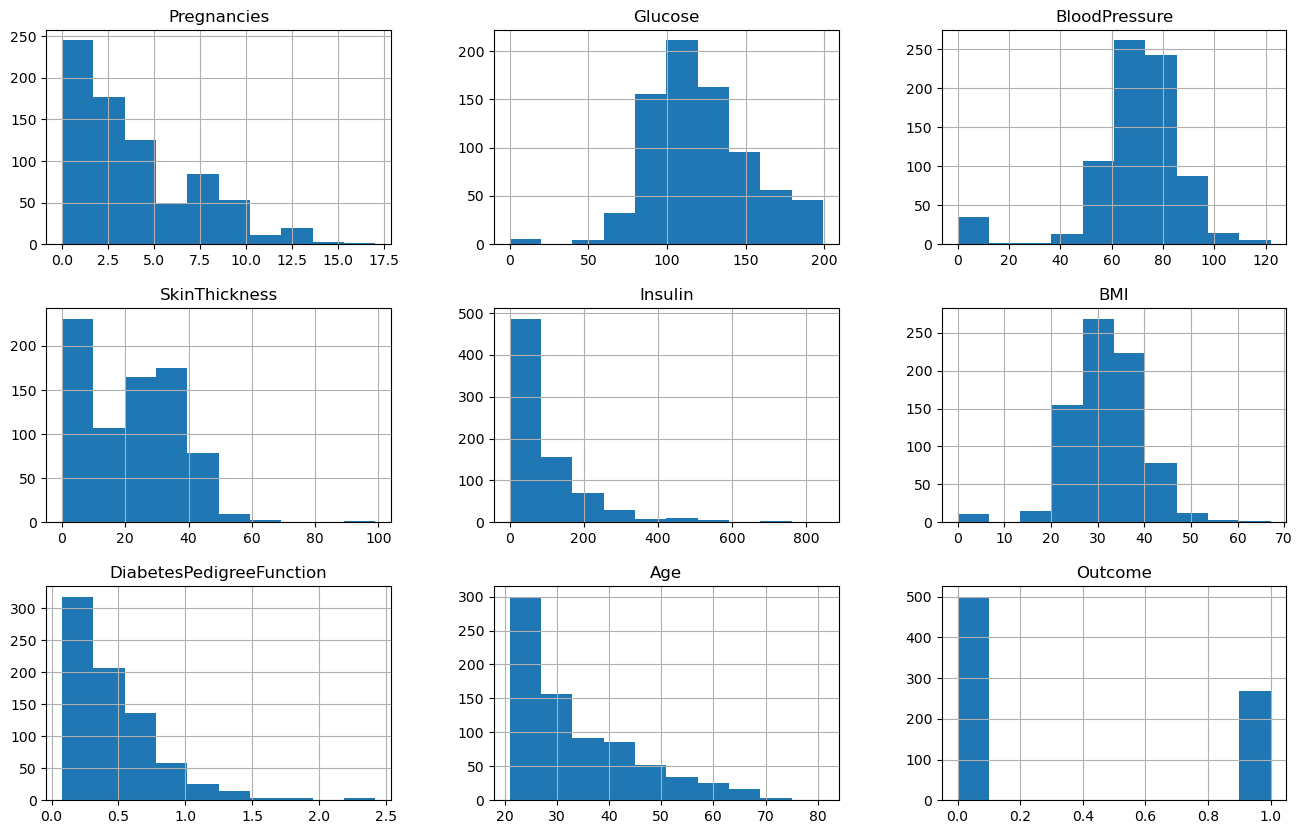

In [9]:
df.hist(figsize=(16,10))

<Axes: >

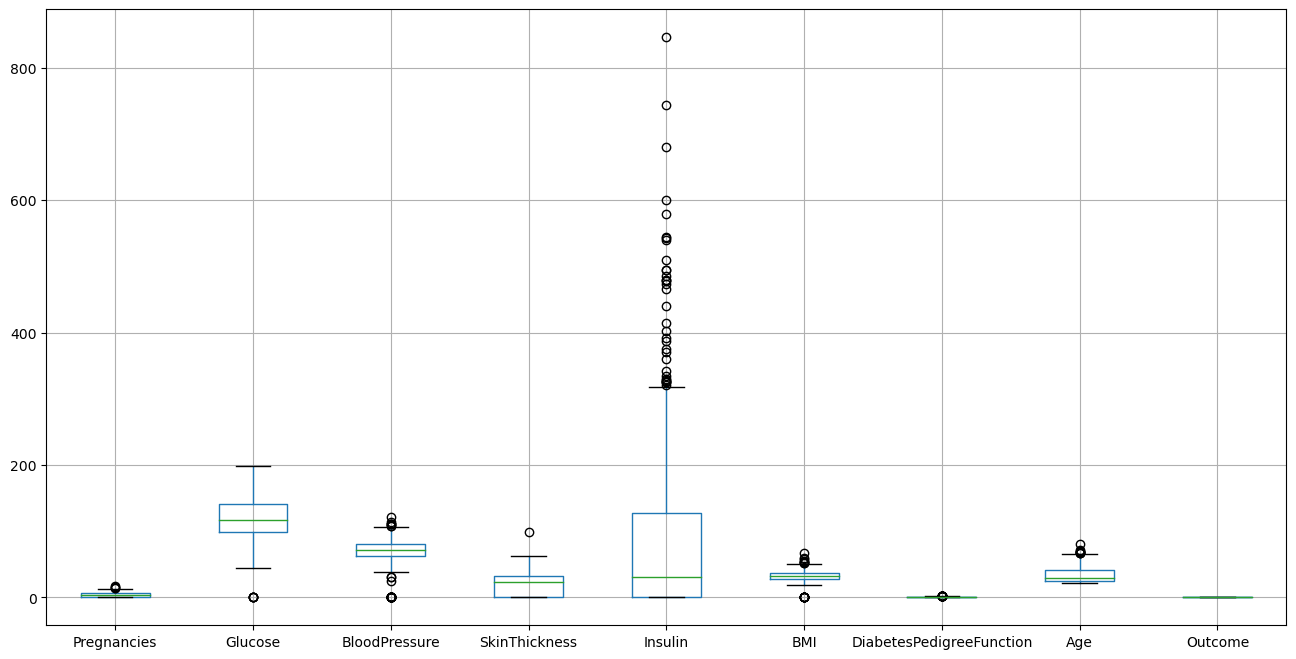

In [10]:
df.boxplot(figsize=(16,8))

<Axes: >

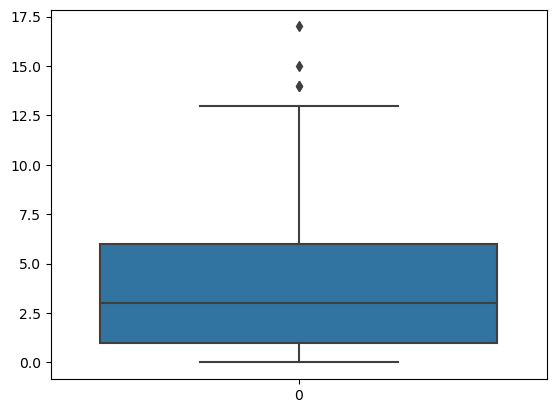

In [11]:
sns.boxplot(df['Pregnancies'])

# Assign the X & Y

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:].values

In [13]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148,72,35.0,0,33.6,0.627,50.0
1,8.0,85,66,29.0,0,26.6,0.351,32.0


<Axes: ylabel='count'>

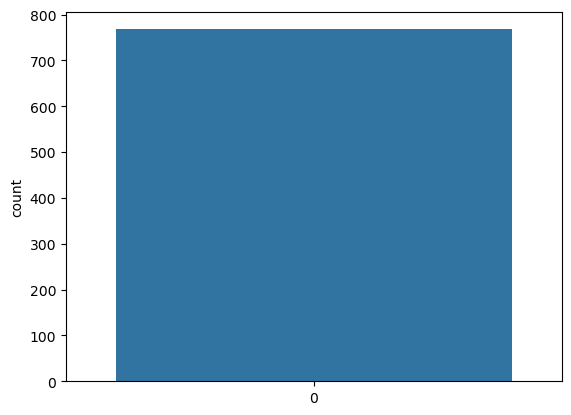

In [15]:
sns.countplot(df['Outcome'])

# Split the data for Training & Testing

In [18]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)

print('***************Training Data Shape...............****\n')

print('Training data-X- Shape: \t',xtrain.shape)

print()

print('Training data-y- Shape: \t', ytrain.shape)

print()

print('***************Testing Data Shape*******************\n')

print('Testing data(x-Input) Shape: \t', xtest.shape)

print()

print('Testing data(y-Outcome) Shape:\t',ytest.shape)

***************Training Data Shape...............****

Training data-X- Shape: 	 (576, 8)

Training data-y- Shape: 	 (576, 1)

***************Testing Data Shape*******************

Testing data(x-Input) Shape: 	 (192, 8)

Testing data(y-Outcome) Shape:	 (192, 1)


# Model Development with Logistic Regression Algorithm

In [22]:
#invoke the Log reg algorithm from sklearn

log_reg=LogisticRegression(solver='liblinear', verbose=2)

#Train the model

print('Training the model\n')
log_reg.fit(xtrain, ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples: \n', ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))

Training the model

[LibLinear]Predicted Label for the input samples: 
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0]

Testing is completed

Testing samples are: 	 192


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Performance Measures

In [23]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('********************Performance Measures for Logistic Regression Classification*********')
print('Accuracy Score:\t\n', accuracy_score(ytest, ypred))
print()
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report: \n', classification_report(ytest,ypred))
print('='*80)

********************Performance Measures for Logistic Regression Classification*********
Accuracy Score:	
 0.7604166666666666

Confusion Matrix:
 [[121  13]
 [ 33  25]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       134
           1       0.66      0.43      0.52        58

    accuracy                           0.76       192
   macro avg       0.72      0.67      0.68       192
weighted avg       0.75      0.76      0.74       192



In [24]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
log_reg.classes_

array([0, 1], dtype=int64)

In [26]:
log_reg.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(solver='liblinear', verbose=2)>

In [27]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

# ROC Curve

In [28]:
y_probs = log_reg.predict_proba(xtest)[:,1]
y_probs

array([0.08867946, 0.20436704, 0.11852957, 0.20293295, 0.45903765,
       0.17107269, 0.11086474, 0.42839362, 0.10478583, 0.54996264,
       0.41383121, 0.46049241, 0.70549546, 0.20449486, 0.0502735 ,
       0.78687109, 0.79828656, 0.07030348, 0.33820884, 0.80797643,
       0.91462254, 0.79010684, 0.17505306, 0.32742388, 0.14757489,
       0.1141207 , 0.54288149, 0.3726473 , 0.19657892, 0.31020263,
       0.24431265, 0.43058201, 0.06678921, 0.27557649, 0.40642484,
       0.92005269, 0.35746713, 0.75681692, 0.31757295, 0.11260973,
       0.25103537, 0.1009415 , 0.58548219, 0.22504399, 0.05906768,
       0.08313809, 0.27410264, 0.43343787, 0.12995668, 0.44023534,
       0.9631171 , 0.09595362, 0.32135212, 0.73731387, 0.37600675,
       0.47335157, 0.88162224, 0.38263526, 0.25806379, 0.09172959,
       0.40422002, 0.81077224, 0.79035913, 0.84087039, 0.32464727,
       0.11977772, 0.93667066, 0.34972082, 0.32314778, 0.34307042,
       0.14512346, 0.11637109, 0.47320192, 0.12564443, 0.13925

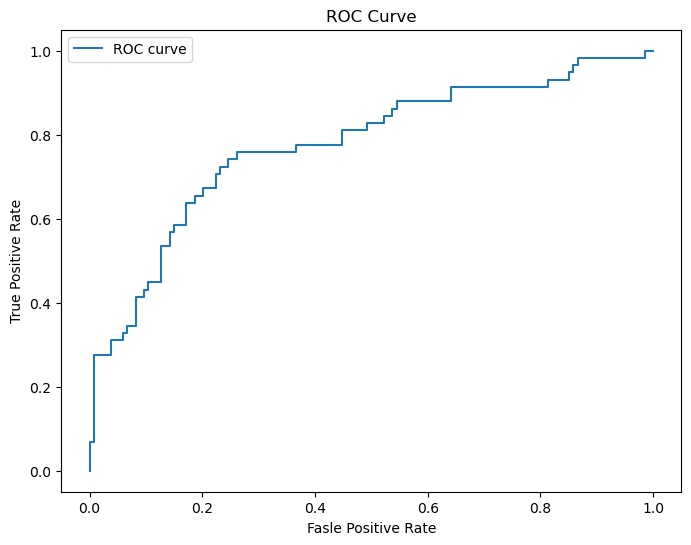

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

#Calculate ROC & AUC
fpr, tpr, thresholds=roc_curve(ytest,y_probs)
roc_curve=auc(fpr,tpr)
#Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [31]:
roc_curve

0.7759907359752959

In [32]:
cm = confusion_matrix(ytest,ypred)

In [33]:
cm

array([[121,  13],
       [ 33,  25]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

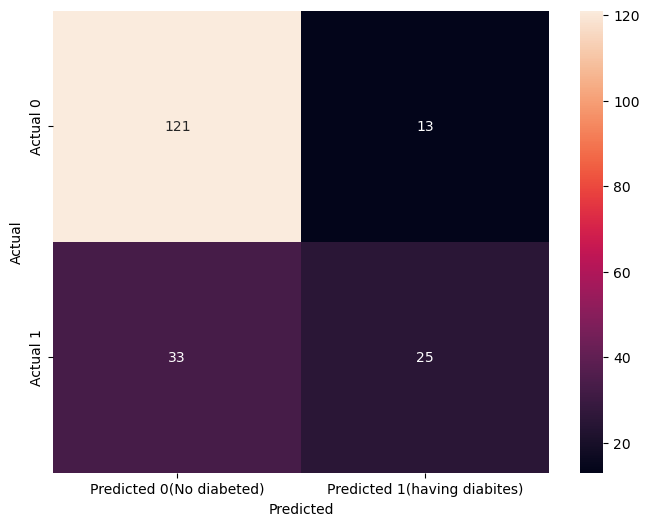

In [37]:
plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted 0(No diabeted)','Predicted 1(having diabites)'] ,yticklabels=["Actual 0", "Actual 1"]) 

plt.xlabel('Predicted')

plt.ylabel("Actual")

In [38]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# UPSAMPLING

In [40]:
df_major = df[df.Outcome==0]
df_minor = df[df.Outcome==1]

In [41]:
df_major.shape,df_minor.shape

((500, 9), (268, 9))

In [42]:
from sklearn.utils import resample

In [43]:
df_minor_upsampled = resample(df_minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=500,    # to match majority class
                                 random_state=123) 

In [44]:
df_upsampled = pd.concat([df_major, df_minor_upsampled])

In [45]:
df_upsampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,8.0,85,66,29.0,0,26.6,0.351,32.0,0
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
5,5.0,116,74,0.0,0,25.6,0.201,30.0,0
7,10.0,115,0,0.0,0,35.3,0.134,29.0,0
10,4.0,110,92,0.0,0,37.6,0.191,30.0,0


In [47]:
df_upsampled['Outcome'].value_counts()

0    500
1    500
Name: Outcome, dtype: int64

In [48]:
x=df_upsampled.iloc[:,:-1]
y=df_upsampled.iloc[:,-1:].values

In [49]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)

print('***************Training Data Shape...............****\n')

print('Training data-X- Shape: \t',xtrain.shape)

print()

print('Training data-y- Shape: \t', ytrain.shape)

print()

print('***************Testing Data Shape*******************\n')

print('Testing data(x-Input) Shape: \t', xtest.shape)

print()

print('Testing data(y-Outcome) Shape:\t',ytest.shape)

***************Training Data Shape...............****

Training data-X- Shape: 	 (750, 8)

Training data-y- Shape: 	 (750, 1)

***************Testing Data Shape*******************

Testing data(x-Input) Shape: 	 (250, 8)

Testing data(y-Outcome) Shape:	 (250, 1)


In [50]:
#invoke the Log reg algorithm from sklearn

log_reg=LogisticRegression(solver='liblinear', verbose=2)

#Train the model

print('Training the model\n')
log_reg.fit(xtrain, ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples: \n', ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))

Training the model

[LibLinear]Predicted Label for the input samples: 
 [0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1
 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1
 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0
 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0
 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0]

Testing is completed

Testing samples are: 	 250


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Performance Measures with Upsampling

In [51]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('********************Performance Measures for Logistic Regression Classification*********')
print('Accuracy Score:\t\n', accuracy_score(ytest, ypred))
print()
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report: \n', classification_report(ytest,ypred))
print('='*80)

********************Performance Measures for Logistic Regression Classification*********
Accuracy Score:	
 0.724

Confusion Matrix:
 [[90 31]
 [38 91]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       121
           1       0.75      0.71      0.73       129

    accuracy                           0.72       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.73      0.72      0.72       250



# ROC curve with upsampling

In [53]:
y_probs = log_reg.predict_proba(xtest)[:,1]
y_probs

array([0.33750581, 0.70230469, 0.53445298, 0.44259644, 0.87167454,
       0.54193766, 0.54120418, 0.04561321, 0.3269345 , 0.38665223,
       0.77474056, 0.21469201, 0.21983884, 0.84468109, 0.47137363,
       0.47225919, 0.67194253, 0.56476047, 0.44158429, 0.12058521,
       0.59102311, 0.46694638, 0.64620065, 0.48158381, 0.31543517,
       0.36858446, 0.46806267, 0.41866001, 0.71678182, 0.89084516,
       0.47253758, 0.27055234, 0.82821759, 0.78537757, 0.26681926,
       0.07409297, 0.18512312, 0.49850016, 0.44451042, 0.71816746,
       0.69053659, 0.30053162, 0.69856554, 0.48335193, 0.74494285,
       0.30615897, 0.60118715, 0.5750545 , 0.48158381, 0.48003455,
       0.61417185, 0.72937023, 0.16304293, 0.53464346, 0.530607  ,
       0.96642782, 0.83930982, 0.30392058, 0.36273538, 0.59777785,
       0.50298998, 0.8875884 , 0.27268076, 0.69399955, 0.40340776,
       0.02497919, 0.19037369, 0.88299902, 0.08631956, 0.21793963,
       0.21910372, 0.16137963, 0.09692653, 0.82297709, 0.09794

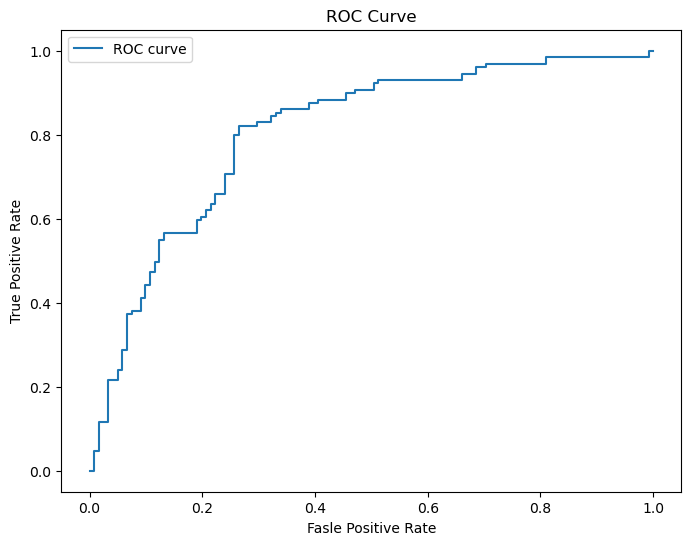

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

#Calculate ROC & AUC
fpr, tpr, thresholds=roc_curve(ytest,y_probs)
roc_curve=auc(fpr,tpr)
#Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [55]:
roc_curve

0.8056890255621756

In [56]:
cm = confusion_matrix(ytest,ypred)

In [57]:
cm

array([[90, 31],
       [38, 91]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

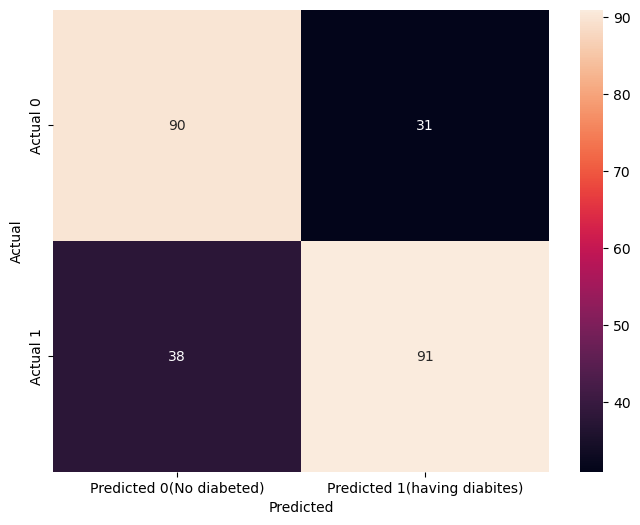

In [58]:
plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted 0(No diabeted)','Predicted 1(having diabites)'] ,yticklabels=["Actual 0", "Actual 1"]) 

plt.xlabel('Predicted')

plt.ylabel("Actual")

In [59]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# DOWNSAMPLING

In [61]:
df_major_downsampled = resample(df_major, 
                                 replace=True,    # sample without replacement
                                 n_samples=268,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_major_downsampled, df_minor])

In [64]:
df_downsampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
562,1.0,87,68,34.0,77,37.6,0.401,24.0,0
583,8.0,100,76,0.0,0,38.7,0.190,42.0,0
505,10.0,75,82,0.0,0,33.3,0.263,38.0,0
727,0.0,141,84,26.0,0,32.4,0.433,22.0,0
151,4.0,114,65,0.0,0,21.9,0.432,37.0,0


In [63]:
df_downsampled['Outcome'].value_counts()

0    268
1    268
Name: Outcome, dtype: int64

In [65]:
x=df_downsampled.iloc[:,:-1]
y=df_downsampled.iloc[:,-1:].values

In [66]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)

print('***************Training Data Shape...............****\n')

print('Training data-X- Shape: \t',xtrain.shape)

print()

print('Training data-y- Shape: \t', ytrain.shape)

print()

print('***************Testing Data Shape*******************\n')

print('Testing data(x-Input) Shape: \t', xtest.shape)

print()

print('Testing data(y-Outcome) Shape:\t',ytest.shape)

***************Training Data Shape...............****

Training data-X- Shape: 	 (402, 8)

Training data-y- Shape: 	 (402, 1)

***************Testing Data Shape*******************

Testing data(x-Input) Shape: 	 (134, 8)

Testing data(y-Outcome) Shape:	 (134, 1)


In [67]:
#invoke the Log reg algorithm from sklearn

log_reg=LogisticRegression(solver='liblinear', verbose=2)

#Train the model

print('Training the model\n')
log_reg.fit(xtrain, ytrain)
#Test the model
ypred=log_reg.predict(xtest)
print('Predicted Label for the input samples: \n', ypred)
print()
print('Testing is completed\n')
print('Testing samples are: \t',len(ypred))

Training the model

[LibLinear]Predicted Label for the input samples: 
 [0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0
 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1
 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1]

Testing is completed

Testing samples are: 	 134


C:\Users\jagad\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Performance measures with Downsampling

In [68]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('********************Performance Measures for Logistic Regression Classification*********')
print('Accuracy Score:\t\n', accuracy_score(ytest, ypred))
print()
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report: \n', classification_report(ytest,ypred))
print('='*80)

********************Performance Measures for Logistic Regression Classification*********
Accuracy Score:	
 0.7313432835820896

Confusion Matrix:
 [[51 20]
 [16 47]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74        71
           1       0.70      0.75      0.72        63

    accuracy                           0.73       134
   macro avg       0.73      0.73      0.73       134
weighted avg       0.73      0.73      0.73       134



# ROC curve with downsampling

In [69]:
y_probs = log_reg.predict_proba(xtest)[:,1]
y_probs

array([0.40608599, 0.72730521, 0.45061528, 0.27590114, 0.77120628,
       0.92158307, 0.75700001, 0.68760543, 0.20808419, 0.84024378,
       0.90424319, 0.66796526, 0.14958685, 0.91855063, 0.20445803,
       0.56685425, 0.53752904, 0.83457132, 0.45857234, 0.49180935,
       0.89783252, 0.9181616 , 0.32975651, 0.80613903, 0.8543586 ,
       0.3500992 , 0.62968894, 0.63672648, 0.32539188, 0.46572374,
       0.60303656, 0.58793578, 0.35101554, 0.74213847, 0.87214544,
       0.83142258, 0.11726259, 0.28328644, 0.48406703, 0.18865369,
       0.91855063, 0.43071453, 0.85512172, 0.30447799, 0.91855063,
       0.30652759, 0.8943392 , 0.14958685, 0.60826844, 0.18823559,
       0.85090281, 0.22948191, 0.85293738, 0.8739635 , 0.26263683,
       0.69398681, 0.23753027, 0.39815076, 0.79203837, 0.57250262,
       0.29207852, 0.27746502, 0.22927245, 0.22387178, 0.3624667 ,
       0.77693088, 0.25421988, 0.61837271, 0.70738541, 0.64727876,
       0.37298135, 0.61717199, 0.49846979, 0.75871537, 0.45358

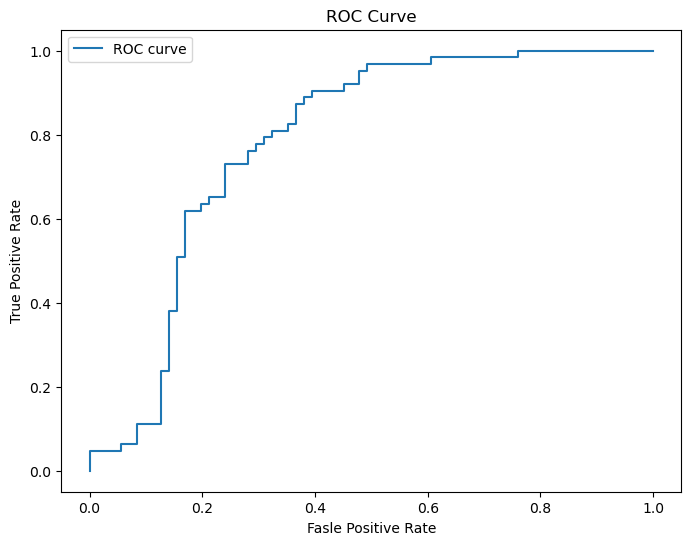

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

#Calculate ROC & AUC
fpr, tpr, thresholds=roc_curve(ytest,y_probs)
roc_curve=auc(fpr,tpr)
#Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [71]:
roc_curve

0.784037558685446

In [72]:
cm = confusion_matrix(ytest,ypred)
cm

array([[51, 20],
       [16, 47]], dtype=int64)

Text(70.72222222222221, 0.5, 'Actual')

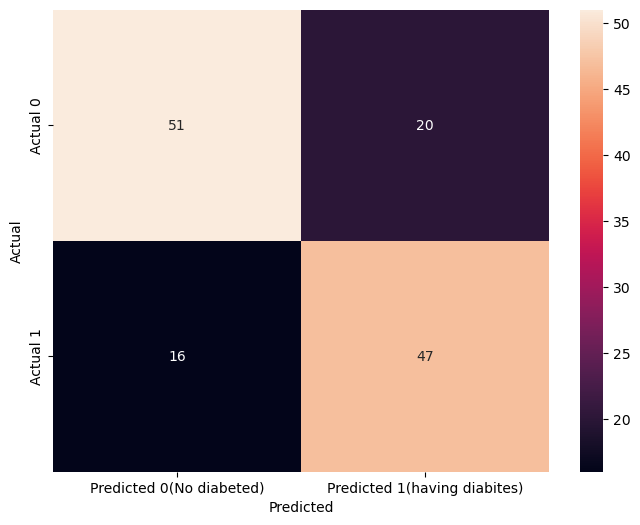

In [73]:
plt.figure(figsize=(8,6))

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted 0(No diabeted)','Predicted 1(having diabites)'] ,yticklabels=["Actual 0", "Actual 1"]) 

plt.xlabel('Predicted')

plt.ylabel("Actual")